<a href="https://colab.research.google.com/github/datascience-hassan/Hassan_INFO4670_Spring2026/blob/main/Hassan_Abdule_Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [35]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Assignmen2.csv")
df.head()

,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [41]:
region_counts = df["region"].value_counts()

print(region_counts)

print("number of regions:", len(region_counts))


region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

The dataset includes 54 regions,
This shows the data is evenly distributed across regions

type distribution (%)
type
conventional    50.01
organic         49.99
Name: proportion, dtype: float64
number of types: 2


/tmp/ipython-input-2649699323.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_dist.index, y=type_dist.values, palette='viridis')


<Axes: xlabel='type'>

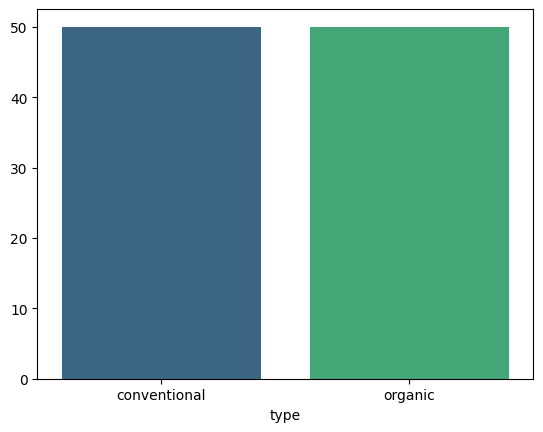

In [46]:
type_dist = (df["type"].value_counts(normalize=True, dropna=False) * 100).round(2)

print("type distribution (%)")
print(type_dist)

print("number of types:", len(type_dist))

sns.barplot(x=type_dist.index, y=type_dist.values, palette='viridis')

Type is balanced: organic = 50.00% and conventional = 49.99%, so there is no type bias.


year counts
year
1904       1
2015    5615
2016    5616
2017    5722
2018    1298
Name: count, dtype: int64


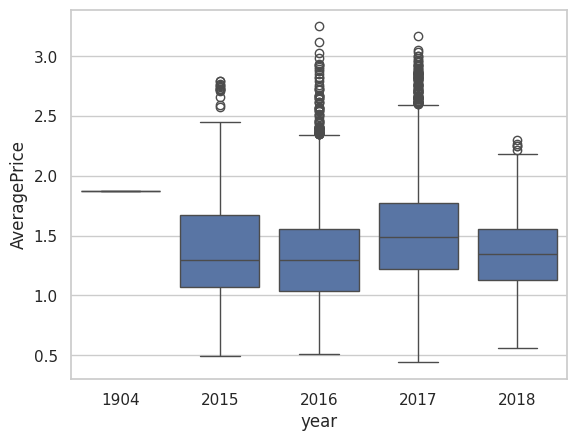

In [50]:
year_counts = df["year"].value_counts(dropna=False).sort_index()

print("\nyear counts")
print(year_counts)

sns.boxplot(x=df["year"], y=df["AveragePrice"])
plt.show()



### Summary of Data Distribution Findings
*   **Region Distribution**: The data is evenly distributed across the 54 regions, with each region representing approximately 1.85% - 1.86% of the total records. No significant bias was observed in the region distribution.
*   **Year Distribution**: The data is imbalanced by year. While years 2015, 2016, and 2017 have a similar number of records (around 5600-5700), the year 2018 has significantly fewer records (1300). Additionally, there is one anomalous record from 1904, which likely represents a data entry error and contributes to imbalance. This temporal imbalance could affect models trained on this dataset, especially for predictions related to 2018 or earlier.
*   **Type Distribution**: The 'type' variable is well-balanced, with an almost equal split between 'organic' and 'conventional' avocados. This suggests no bias in this particular categorical feature.

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [36]:
# Write your code here

missing_values = df.isnull().sum().sum()        # df.isnull().sum() #df.duplicates()
print('TOTAL missing values, ', missing_values)
print('Duplicates' , df.duplicated().sum())


TOTAL missing values,  12
Duplicates 2


when the number of missing rows is very small comapred to the total dataset is okay to drop it, if there is huge missing data is better to fillin with mean or median depednig on your data


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here
df.shape
#There are 18254 rows and 14 columns

(18254, 14)

With 18,254 rows and 14 columns, this is generally enough data to train a machine learning model, especially for common models like linear/logistic regression, decision trees, random forest, and gradient boosting.is. decent size

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [37]:
# write your code here
df = df.drop(columns=["Column 1"])

# Treat the 'year' variable as nominal
df['year'] = df['year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18254 non-null  object 
 1   AveragePrice  18254 non-null  float64
 2   Total Volume  18253 non-null  float64
 3   4046          18252 non-null  float64
 4   4225          18253 non-null  float64
 5   4770          18253 non-null  float64
 6   Total Bags    18253 non-null  float64
 7   Small Bags    18252 non-null  float64
 8   Large Bags    18252 non-null  float64
 9   XLarge Bags   18253 non-null  float64
 10  type          18253 non-null  object 
 11  year          18254 non-null  object 
 12  region        18254 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


2.2 Check for duplicate values and remove them.

In [38]:
# Write your code here
df = df.drop_duplicates()

#check for duplicates
print("how many duplicates left", df.duplicated().sum())


how many duplicates left 0


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [39]:
df = df.fillna(df.median(numeric_only=True))

df["type"] = df["type"].fillna(df["type"].mode()[0])


missing_values = df.isnull().sum().sum()
print('TOTAL missing values:', missing_values)





TOTAL missing values: 0


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192772 -0.208334 -0.172948 -0.179463   
Total Volume     -0.192772      1.000000  0.977863  0.974181  0.872203   
4046             -0.208334      0.977863  1.000000  0.926111  0.833390   
4225             -0.172948      0.974181  0.926111  1.000000  0.887856   
4770             -0.179463      0.872203  0.833390  0.887856  1.000000   
Total Bags       -0.177107      0.963047  0.920057  0.905788  0.792316   
Small Bags       -0.174748      0.967238  0.925280  0.916032  0.802734   
Large Bags       -0.172958      0.880641  0.838646  0.810017  0.698473   
XLarge Bags      -0.117608      0.747159  0.699379  0.688811  0.679863   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177107   -0.174748   -0.172958    -0.117608  
Total Volume    0.963047    0.967238    0.880641     0.747159  
4046            0.920057    0.925280    0.838646     0.699379  
422

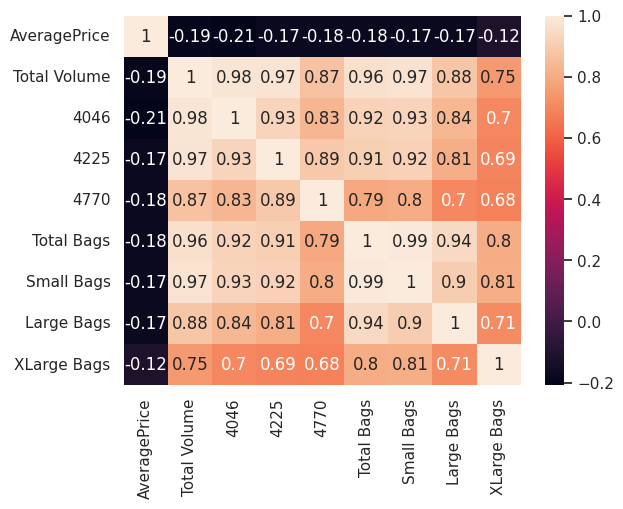

In [52]:
# Write your code here
corr = df.corr(numeric_only=True)
print(corr)

#heat map
sns.heatmap(corr, annot=True)
plt.show()

# The correlation matrix shows several very high correlations
# sometimes linear models like linear/logistic regression less stable and sometimes reduce accuracy.

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [51]:
# Write your code here
continuous_cols = ['AveragePrice', 'Total Volume', 'Total Bags', 'year', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
print(df[continuous_cols].describe())




       AveragePrice  Total Volume    Total Bags          4046          4225  \
count  18252.000000  1.825200e+04  1.825200e+04  1.825200e+04  1.825200e+04   
mean       1.406032  8.505116e+05  2.396030e+05  2.929613e+05  2.951080e+05   
std        0.402668  3.453277e+06  9.861654e+05  1.264890e+06  1.204027e+06   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.084172e+04  5.089967e+03  8.544900e+02  3.008553e+03   
50%        1.370000  1.073542e+05  3.973853e+04  8.643200e+03  2.905673e+04   
75%        1.660000  4.329334e+05  1.107766e+05  1.109857e+05  1.500853e+05   
max        3.250000  6.250565e+07  1.937313e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.825200e+04  1.825200e+04  1.825200e+04  1.825200e+04   18252.000000  
mean   2.283603e+04  2.396030e+05  1.821681e+05  5.432945e+04    3105.915918  
std    1.074556e+05  9.861654e+05  7.461201e+05  2.

AveragePrice: Ranges from  0.44 to  3.25. The mean 1.41 is slightly higher than the median 1.37, indicating a slightly right-skewed distribution.

Total Volume: Ranges from 8.4 to 6.25. The mean is much higher than the median.

Total Bags: Ranges from 0 to 1.93.

Small bags: Ranges from 0 to 1.33.

Large Bags: Ranges from 0 to 5.7.

XLarge Bags: Ranges from 17691 to 551693.


In [30]:
print("Unique Regions:", df['region'].unique())

Unique Regions: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [31]:

print("Unique Types:", df['type'].unique())

Unique Types: ['conventional' 'organic']


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [22]:
# Write your code here
df["Date"] = pd.to_datetime(df["Date"],errors="coerce")
earliest_date = df["Date"].min()
print("Earliest Date:", earliest_date)


pre2011 = df[df["Date"] <= "2010-12-31"]
print(f"Records from 2010 or earlier: {len(pre2011)}")
print(pre2011[["Date", "year", "region", "AveragePrice"]].head())
# 1904 is not reasonable shoud be removed



Earliest Date: 1904-01-21 00:00:00
Records from 2010 or earlier: 1
            Date  year            region  AveragePrice
18250 1904-01-21  1904  WestTexNewMexico          1.87


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
df[df["AveragePrice"] == df["AveragePrice"].max()] # thats the highest value in AveragePrice

# it belongs to sanFrancisco region
# I used max() to find the highest value in AveragePrice, then filtered the dataset to the row where AveragePrice equals that maximum and read the region value







,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14125,2016-10-30,3.25,16700.94,2325.93,11142.85,0.0,3232.16,3232.16,0.0,0.0,organic,2016,SanFrancisco


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
df[df["Total Volume"] == df["Total Volume"].max()]

# it belongs to TotalUS
# I used .max() to get the highest value in Total Volume, then filtered the dataframe to the row where Total Volume equals that max and read the region

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9097,2018-02-04,0.87,62505646.52,21620180.9,20445501.03,1066830.22,19373134.37,13384586.8,5719096.61,269450.96,conventional,2018,TotalUS
